Trong bài này ta làm quen với học không giám sát (chỉ có feature, không có nhãn label y)
- Ta thực hiện với KMeans

Tham khảo : https://machinelearningcoban.com/2017/01/01/kmeans/

Load dữ liệu iris từ sklearn, ta không lấy nhãn y

In [1]:
from sklearn.datasets import load_iris
import numpy as np

data = load_iris(as_frame=True)
display(data.data)
X = data.data.values

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Trực quan dữ liệu để xem nên phân thành bao nhiêu cụm

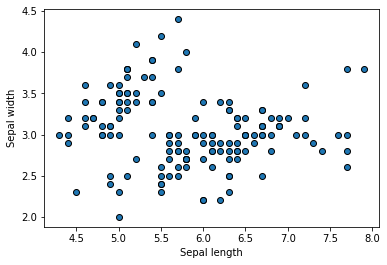

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

Ta thực hiện KMeans với 3 cụm

In [3]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(X)
label = model.predict(X)
print(label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


Ta xem hình ảnh sau khi phân cụm

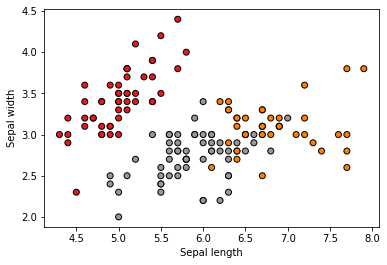

In [4]:
plt.scatter(X[:, 0], X[:, 1], c= label, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

Chúng ta xem các điểm trung tâm của cụm

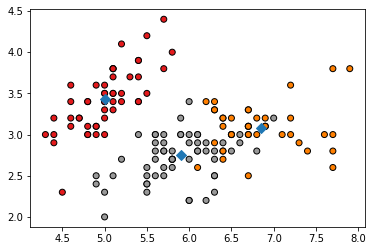

In [5]:
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

plt.scatter(X[:, 0], X[:, 1], c= label, cmap=plt.cm.Set1,
            edgecolor='k')
plt.scatter(centroids_x,centroids_y, marker = 'D', s =50)
plt.show()

- Làm sao để đánh giá mô hình KMean ?
- Đầu tiên ta xem xét inertia 

<img src ='https://i.imgur.com/cK8o1lv.jpg'>

Tham khảo: https://scikit-learn.org/stable/modules/clustering.html 

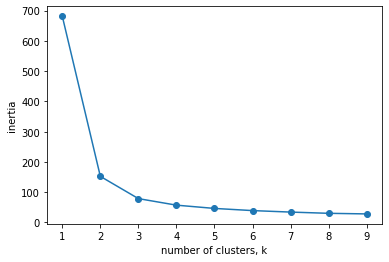

In [6]:
inertias = []
for k in range(1,10):
    model = KMeans(k)
    model.fit(X)
    inertias.append(model.inertia_)

plt.plot(range(1,10), inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(range(1,10))
plt.show()

Đương nhiên inertia càng nhỏ càng tốt, nhưng ta chon k=3 vì sau khi k>3 mức độ giảm của inertia không còn nhanh như trước nữa.

In [7]:
y = load_iris().target_names
y

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
import pandas as pd
specie = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
species_df = pd.DataFrame({'specie':load_iris().target}).specie.map(specie)
species = species_df.values
display(species_df.value_counts())
print(species)

setosa        50
virginica     50
versicolor    50
Name: specie, dtype: int64

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'v

In [9]:
model = KMeans(3)
model.fit(X)
labels = model.predict(X)

df = pd.DataFrame({'labels': labels,'species': species})
ct = pd.crosstab(df['labels'], df['species'])
print(ct)

species  setosa  versicolor  virginica
labels                                
0             0          48         14
1            50           0          0
2             0           2         36


- Ta thấy khi đối chiếu với giá trị thực với phân cụm ở cụm 1, và 2 còn lỗi so với thực tế.
- Ta thử xử lý data bằng standerscale (giống phần học có giám sát), và xem kết quả:

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

steps = [('scale', StandardScaler()), ('Kmean', KMeans(3))]
pipeline = Pipeline(steps)
pipeline.fit(X)

scale_label = pipeline.predict(X)

df = pd.DataFrame({'labels': scale_label,'species': species})
ct = pd.crosstab(df['labels'], df['species'])
print(ct)

species  setosa  versicolor  virginica
labels                                
0             0          39         14
1            50           0          0
2             0          11         36


normalizer

In [11]:
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline

steps = [('scale', Normalizer()), ('Kmean', KMeans(3))]
pipeline = Pipeline(steps)
pipeline.fit(X)

scale_label = pipeline.predict(X)

df = pd.DataFrame({'labels': scale_label,'species': species})
ct = pd.crosstab(df['labels'], df['species'])
print(ct)

species  setosa  versicolor  virginica
labels                                
0             0          45          0
1            50           0          0
2             0           5         50


Ta thấy với việc scale bằng normalizer cho kết quả khá tốt so với StandardScaler, và với việc không có scale!!!